In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

# Import Tensorflow with multiprocessing
import tensorflow as tf

In [ ]:
# Loading the CIFAR-10 dataset

from tensorflow.keras.datasets import cifar10

# Declare variables

BATCH_NORM = False

batch_size = 64
num_classes = 10
epochs = 25
data_augmentation = True

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # x_train - training data(images), y_train - labels(digits)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
#class_names = ['airplane','automobile','bird','cat','deer',
#               'dog','frog','horse','ship','truck']


# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Functional api

In [ ]:
# Define Model
def conv_layer(filters, block_id, conv_id, input_layer):
    x = Conv2D(filters, (3, 3), padding='same', name='block'+str(block_id)+'conv'+str(conv_id))(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def dense(num_neurons, dense_id, inp_layer, activation='relu'):  
    x = Dense(num_neurons, name="fc"+str(dense_id))(inp_layer)
    x = BatchNormalization()(x)
    x = Activation(activation)(x)
    return x    
  
def base_model():
    input_layer = Input(shape=(32,32,3))

    x = Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:], name='block1_conv1')(input_layer)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = conv_layer(64, 1, 2, x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)
    
    x = conv_layer(128, 2, 1, x)
    x = conv_layer(128, 2, 2, x)    

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    x = conv_layer(256, 3, 1, x)
    x = conv_layer(256, 3, 2, x) 
    x = conv_layer(256, 3, 3, x) 

    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    x = conv_layer(512, 4, 1, x)
    x = conv_layer(512, 4, 2, x)
    x = conv_layer(512, 4, 3, x)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    x = conv_layer(512, 5, 1, x)
    x = conv_layer(512, 5, 2, x) 
    x = conv_layer(512, 5, 3, x) 

    x = Flatten()(x)

    x = dense(4096, 1, x)
    
    x = Dropout(0.5)(x)

    x = dense(4096, 2, x)    
    
    x = Dropout(0.5)(x)
    
    out = dense(num_classes, 3, x, activation='softmax')
    
    model = Model(inputs=input_layer, outputs=out)
    
    return model

model = base_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
block1conv2 (Conv2D)         (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0     

In [ ]:
sgd = SGD(lr=0.0005, decay=0, nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

Epoch 1/25
782/782 [==============================] - 25s 32ms/step - loss: 1.4420 - accuracy: 0.4865 - val_loss: 2.3225 - val_accuracy: 0.3298
Epoch 2/25
782/782 [==============================] - 24s 31ms/step - loss: 0.9488 - accuracy: 0.6869 - val_loss: 0.9010 - val_accuracy: 0.7059
Epoch 3/25
782/782 [==============================] - 24s 31ms/step - loss: 0.7538 - accuracy: 0.7598 - val_loss: 0.9178 - val_accuracy: 0.7142
Epoch 4/25
782/782 [==============================] - 24s 31ms/step - loss: 0.6296 - accuracy: 0.8013 - val_loss: 0.7807 - val_accuracy: 0.7448
Epoch 5/25
782/782 [==============================] - 24s 31ms/step - loss: 0.5293 - accuracy: 0.8349 - val_loss: 1.1317 - val_accuracy: 0.6701
Epoch 6/25
782/782 [==============================] - 24s 31ms/step - loss: 0.4494 - accuracy: 0.8609 - val_loss: 0.8238 - val_accuracy: 0.7540
Epoch 7/25
782/782 [==============================] - 24s 31ms/step - loss: 0.3846 - accuracy: 0.8823 - val_loss: 0.8596 - val_accuracy:

313/313 - 2s
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[874   3   5  17   3   1   0   2  43  52]
 [  9 851   0   2   1   0   0   0   8 129]
 [ 94   5 680  61  71  32  15  16  13  13]
 [ 15   3  19 785  38  82   9  15  14  20]
 [ 23   1  15  63 839  15   3  26   4  11]
 [ 10   7  21 127  24 774   3  22   3   9]
 [ 15  11  13 115  44  20 698   3  46  35]
 [ 14   3   7  41  30  22   1 856   4  22]
 [ 51  13   0   9   0   0   1   1 896  29]
 [  7  12   0   5   0   0   0   0   9 967]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


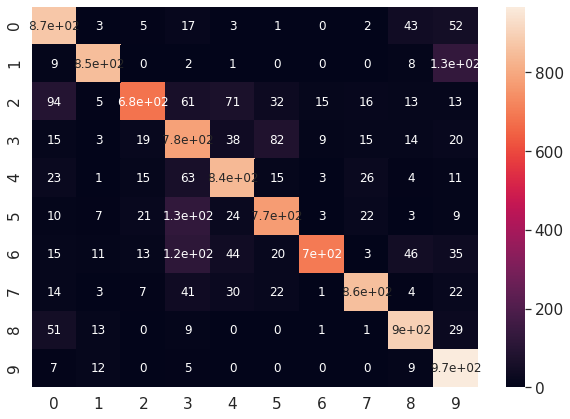

In [ ]:


# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()